In [1]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt

### Index column - datetime

In [2]:
def gen_datetime():
    '''
    Generates a list of dates from (2019-09-01 00:00:00 to 2019-09-30 23:59:59)
    with a step of 30 minutes. (The measurement periods for traffic)
    
        Args:
            
        Returns:
            traffic_datetime(list): the list of generated dates
    '''
    
    import datetime
    dt = datetime.datetime(2019, 9, 1)
    end = datetime.datetime(2019, 9, 30, 23, 59, 59)
    step = datetime.timedelta(seconds=1800)

    traffic_datetime = []

    while dt < end:
        traffic_datetime.append(dt.strftime('%Y-%m-%d %H:%M:%S'))
        dt += step

    #print(traffic_datetime)
    print('Traffic datetime')
    print('Target observations:', len(traffic_datetime))
    return traffic_datetime

### Day column

In [3]:
#function taken from https://stackoverflow.com/questions/9847213/how-do-i-get-the-day-of-week-given-a-date-in-python/9847359
def weekDay(year, month, day):
    offset = [0, 31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334]
    week   = ['Sunday', 
              'Monday', 
              'Tuesday', 
              'Wednesday', 
              'Thursday',  
              'Friday', 
              'Saturday']
    afterFeb = 1
    if month > 2: afterFeb = 0
    aux = year - 1700 - afterFeb
    # dayOfWeek for 1700/1/1 = 5, Friday
    dayOfWeek  = 5
    # partial sum of days betweem current date and 1700/1/1
    dayOfWeek += (aux + afterFeb) * 365                  
    # leap year correction    
    dayOfWeek += aux / 4 - aux / 100 + (aux + 100) / 400     
    # sum monthly and day offsets
    dayOfWeek += offset[month - 1] + (day - 1)               
    dayOfWeek %= 7
    return int(dayOfWeek), week[int(dayOfWeek)]

In [4]:
from datetime import datetime

def gen_weekdays(traffic_datetime):
    '''
    Maps the current measurement period the day of the week.
    
        Args:
            traffic_datetime(list): the list of generated dates
            
        Returns:
            traffic_days(list): the list of generated days in text format
    '''
    
    traffic_days = []
    for traffic_dateind in traffic_datetime:
        cur_date = datetime.strptime(traffic_dateind, '%Y-%m-%d %H:%M:%S')
        _, weekday = weekDay(cur_date.year, cur_date.month, cur_date.day)
        traffic_days.append(weekday)
        #print(weekday)
        
    print('Traffic days')
    print('Traffic day length: ', len(traffic_days))
    return traffic_days

### Commutes for each area (flow of traffic)

In [5]:
def gen_commutes(traffic_days):
    '''
    Specifies the flow of people going to the city centre, depending on the day of the week.
    
        Args:
            traffic_days(list): the list of generated days in text format
            
        Returns:
            com_a(list): the commute for city A at the current period
            com_b(list): the commute for city B at the current period
            com_c(list): the commute for city C at the current period
            com_d(list): the commute for city D at the current period
    '''
    
    pop_a = 30000; pop_b = 45000; pop_c = 55000; pop_d = 65000;
    com_a = []; com_b = []; com_c = []; com_d = [];
    for traffic_day in traffic_days:
        if traffic_day in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']:
            com_a_i = 0.05 * pop_a
            com_b_i = 0.05 * pop_b
            com_c_i = 0.05 * pop_c
            com_d_i = 0.05 * pop_d
        else:
            com_a_i = 0.03 * pop_a
            com_b_i = 0.03 * pop_b
            com_c_i = 0.03 * pop_c
            com_d_i = 0.03 * pop_d
        com_a.append(com_a_i); com_b.append(com_b_i); com_c.append(com_c_i); com_d.append(com_d_i);
    print('Daily commutes')
    print(set(com_a), set(com_b), set(com_c), set(com_d))
    print(len(com_a), len(com_b), len(com_c), len(com_d))
    return com_a, com_b, com_c, com_d

### Time period - [1;4], Busy period - boolean variable

In [6]:
def gen_time_and_busy_periods(traffic_datetime):  
    '''
    Generates a list of periods, depending on the current time and whether they are
    busy/non-busy.
    
        Args:
            traffic_datetime(list): the list of generated dates
            
        Returns:
            period(list): the current traffic period [1, 2, 3, 4]
            busy(list): T/F
    '''
    busy = []
    period = []
    for traffic_dateind in traffic_datetime:
        cur_date = datetime.strptime(traffic_dateind, '%Y-%m-%d %H:%M:%S')
        _, weekday = weekDay(cur_date.year, cur_date.month, cur_date.day)
        if weekday in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']:
            if cur_date.hour > 6 and cur_date.hour < 10: # 7AM to 10AM
                period_i = 1
                busy_i = True
            elif cur_date.hour > 9 and cur_date.hour < 16: #10AM to 4PM
                period_i = 2
                busy_i = False
            elif cur_date.hour > 15 and cur_date.hour < 19: #4PM to 7PM
                period_i = 3
                busy_i = True
            else:
                period_i = 4
                busy_i = False
        else:
            period_i = 4
            busy_i = False
        period.append(period_i); busy.append(busy_i);
        
    print(len(busy), len(period))
    return period, busy

In [7]:
'''
for i in range(len(busy)):
    cur_date = datetime.strptime(traffic_datetime[i], '%Y-%m-%d %H:%M:%S')
    print("Time of Day:", cur_date)
    print("Period: {}, Busy: {}".format(period[i], busy[i]))
    print("")
print(busy[80])
print(period[80])
print(len(busy), len(period))
'''

'\nfor i in range(len(busy)):\n    cur_date = datetime.strptime(traffic_datetime[i], \'%Y-%m-%d %H:%M:%S\')\n    print("Time of Day:", cur_date)\n    print("Period: {}, Busy: {}".format(period[i], busy[i]))\n    print("")\nprint(busy[80])\nprint(period[80])\nprint(len(busy), len(period))\n'

### Roadwork for each road - boolean random variable

In [8]:
def gen_roadworks(traffic_datetime, busy):
    '''
    Simulates roadworks occuring with a 0.05 chance for each area.
    
        Args:
            traffic_datetime(list): the list of generated dates
            busy(list): T/F
            
        Returns:
            rw_a(list): T/F
            rw_b(list): T/F
            rw_c(list): T/F
            rw_d(list): T/F
    '''
    
    roadwork_samples_a = np.random.rand(len(traffic_datetime))
    roadwork_samples_b = np.random.rand(len(traffic_datetime))
    roadwork_samples_c = np.random.rand(len(traffic_datetime))
    roadwork_samples_d = np.random.rand(len(traffic_datetime))
    print("P(R(A)) = ", roadwork_samples_a)
    print("P(R(B)) = ", roadwork_samples_b)
    print("P(R(C)) = ", roadwork_samples_c)
    print("P(R(D)) = ", roadwork_samples_d)
    rw_a = []; rw_b = []; rw_c = []; rw_d = [];
    threshold = 0.95
    for i in range(len(busy)):
        if busy[i] == False:
            if roadwork_samples_a[i] > 0.95:
                rw_a_i = 1; rw_b_i = 0; rw_c_i = 0; rw_d_i = 0;
            elif roadwork_samples_b[i] > 0.95:
                rw_a_i = 0; rw_b_i = 1; rw_c_i = 0; rw_d_i = 0;
            elif roadwork_samples_c[i] > 0.95:
                rw_a_i = 0; rw_b_i = 0; rw_c_i = 1; rw_d_i = 0;
            elif roadwork_samples_d[i] > 0.95:
                rw_a_i = 0; rw_b_i = 0; rw_c_i = 0; rw_d_i = 1;
            else:
                rw_a_i = 0; rw_b_i = 0; rw_c_i = 0; rw_d_i = 0;
        else:
            rw_a_i = 0; rw_b_i = 0; rw_c_i = 0; rw_d_i = 0;

        rw_a.append(rw_a_i); rw_b.append(rw_b_i); rw_c.append(rw_c_i); rw_d.append(rw_d_i);
    
    print('Roadworks')
    print(rw_a.count(True), rw_b.count(True), rw_c.count(True), rw_d.count(True))
    print(len(rw_a), len(rw_b), len(rw_c), len(rw_d))
    return rw_a, rw_b, rw_c, rw_d

The probability for a roadwork to occur in each area for a certain point in time would be defined as:

$$P_t(R(A|B|C|D)) = 0.05$$

This will be the threshold that will define which road gets closed off. For simplicity, only one of the four roads can be closed off for roadwork at one point in time. If more than one town passes the threshold, the workers will prioritise the lower populated areas <b>(A > B > C > D)</b>. Furthermore, this can only occur when the roads aren't busy <b>(Periods 2 and 4)</b>.

### Congestion level for the city centre

In [9]:
def gen_congestion(traffic_datetime, busy):
    '''
    Simulates congestion in the city centre. Limits the non-busy periods to congestion
    from [0; 0.5].
    
        Args:
            traffic_datetime(list): the list of generated dates
            busy(list): T/F
            
        Returns:
            congestion_level(list): the congestion levels [0; 1]
    '''
    
    congestion_level = np.round(np.random.rand(len(traffic_datetime)), 2)
    for i in range(len(congestion_level)):
        # normalize the congestion levels for non-busy periods
        if busy[i] == False and congestion_level[i] > 0.5:
            congestion_level[i] -= 0.5
            congestion_level[i] = np.round(congestion_level[i], 2)
    print('Congestion level')
    print(congestion_level)
    return congestion_level

### Output sequences t-1 and t

Weekdays:

<b>DCBA -> 7:00, 9:00, 16:00, 18:00</b>

<b>CBAD -> 7:30, 9:30, 16:30, 18:30</b>

<b>BADC -> 8:00, 17:00</b>

<b>ADCB -> 8:30, 17:30</b>

In [10]:
def gen_output_sequence(traffic_datetime, period, busy, rw_a, rw_b, rw_c, rw_d, congestion_level):
    
    '''
    Generates the output sequences based on a fixed set of rules.
    
        Args:
            traffic_datetime(list): the list of generated dates
            busy(list): T/F
            period(list): the current traffic period [1, 2, 3, 4]
            rw_a(list): T/F
            rw_b(list): T/F
            rw_c(list): T/F
            rw_d(list): T/F
            congestion_level(list): the congestion levels

        Returns:
            seq_t(list): output sequences (['E', 'DCBA', 'CBAD', 'BADC', 'ADCB'])
            
    '''
    seq_t = []
            
    for i in range(len(busy)):
        cur_date = datetime.strptime(traffic_datetime[i], '%Y-%m-%d %H:%M:%S')
        #print("Time of Day:", cur_date)
        #print("Period: {}, Busy: {}".format(period[i], busy[i]))
        _, weekday = weekDay(cur_date.year, cur_date.month, cur_date.day)
        if busy[i] == True:
            if congestion_level[i] > 0.95:
                seq_t_i = 'E'
                seq_t.append(seq_t_i)
                continue
            if cur_date.hour in [7, 9, 16, 18]:
                if cur_date.minute == 30:
                    seq_t_i = 'CBAD'
                else:
                    seq_t_i = 'DCBA'
            elif cur_date.hour in [8, 17]:
                if cur_date.minute == 30:
                    seq_t_i = 'ADCB'
                else:
                    seq_t_i = 'BADC'
        else:
            if rw_a[i] == True:
                seq_t_i = 'DCBA'
            elif rw_b[i] == True:
                seq_t_i = 'ADCB'
            elif rw_c[i] == True:
                seq_t_i = 'BADC'
            elif rw_d[i] == True:
                seq_t_i = 'CBAD'
            else:
                seq_t_i = 'E'

        seq_t.append(seq_t_i)
    
    print('Output sequence')
    print(seq_t)
    print(("Number of E sequences:", seq_t.count('E')))
    print(("Number of DCBA sequences:", seq_t.count('DCBA')))
    print(("Number of CBAD sequences:", seq_t.count('CBAD')))
    print(("Number of BADC sequences:", seq_t.count('BADC')))
    print(("Number of ADCB sequences:", seq_t.count('ADCB')))
    print((len(seq_t)))
    return seq_t

In [11]:
def gen_prev_sequence(busy, seq_t):
    '''
    Creates the list of previous sequences by looking at the previous measurement.
    If it's the first one, the output will be 'E'.
    
        Args:
            busy(list): T/F
            seq_t(list): output sequences (['E', 'DCBA', 'CBAD', 'BADC', 'ADCB'])       
            
        Returns:
            seq_t(list): the previous output sequences (['E', 'DCBA', 'CBAD', 'BADC', 'ADCB'])
    '''
    seq_t_prev = []
    for i in range(len(busy)):
        if i == 0:
            seq_t_prev.append('E')
        else:
            seq_t_prev.append(seq_t[i - 1])
    print('Previous sequences')
    #print(seq_t_prev)
    len(seq_t_prev)
    #print(seq_t[80])
    #print(seq_t_prev[80])
    #print(seq_t[81])
    #print(seq_t_prev[81])
    return seq_t_prev

### Create the dataset

In [12]:
def create_dataset():
    '''
    Combines all of the previous lists into a pandas DataFrame.
    
        Returns:
            traffic_data(pd.DataFrame): the output dataset
    '''
    traffic_data = pd.DataFrame()
    traffic_data['Estimation_Time'] = gen_datetime()
    traffic_data['Weekday'] = gen_weekdays(
        list(traffic_data['Estimation_Time']))
    traffic_data['Com_A'], traffic_data['Com_B'], traffic_data[
        'Com_C'], traffic_data['Com_D'] = gen_commutes(
            list(traffic_data['Weekday']))
    traffic_data['Time_Period'], traffic_data[
        'Busy'] = gen_time_and_busy_periods(
            list(traffic_data['Estimation_Time']))
    traffic_data['Roadwork_A'], traffic_data['Roadwork_B'], traffic_data[
        'Roadwork_C'], traffic_data['Roadwork_D'] = gen_roadworks(
            list(traffic_data['Estimation_Time']), list(traffic_data['Busy']))
    traffic_data['Congestion_level'] = gen_congestion(
        list(traffic_data['Estimation_Time']), list(traffic_data['Busy']))
    traffic_data['Sequence'] = gen_output_sequence(
        list(traffic_data['Estimation_Time']), list(traffic_data['Time_Period']),
        list(traffic_data['Busy']), list(traffic_data['Roadwork_A']),
        list(traffic_data['Roadwork_B']), list(traffic_data['Roadwork_C']),
        list(traffic_data['Roadwork_D']), list(traffic_data['Congestion_level']))
    traffic_data['Sequence_prev'] = gen_prev_sequence(
        list(traffic_data['Busy']), list(traffic_data['Sequence']))
    return traffic_data

In [13]:
traffic_data = create_dataset()

Traffic datetime
Target observations: 1440
Traffic days
Traffic day length:  1440
Daily commutes
{1500.0, 900.0} {2250.0, 1350.0} {1650.0, 2750.0} {3250.0, 1950.0}
1440 1440 1440 1440
1440 1440
P(R(A)) =  [0.27979866 0.16977664 0.56698236 ... 0.59850131 0.26034282 0.80445553]
P(R(B)) =  [0.49919118 0.62888974 0.85637269 ... 0.8538347  0.55522441 0.70731723]
P(R(C)) =  [0.8522232  0.9817575  0.66418972 ... 0.04672337 0.50045365 0.5627485 ]
P(R(D)) =  [0.64725562 0.01262351 0.33813804 ... 0.5453758  0.85833447 0.64161554]
Roadworks
61 58 50 53
1440 1440 1440 1440
Congestion level
[0.3  0.44 0.06 ... 0.39 0.31 0.27]
Output sequence
['E', 'BADC', 'E', 'CBAD', 'E', 'E', 'BADC', 'E', 'E', 'E', 'E', 'E', 'ADCB', 'ADCB', 'E', 'ADCB', 'E', 'E', 'BADC', 'E', 'E', 'E', 'E', 'DCBA', 'BADC', 'E', 'ADCB', 'E', 'E', 'E', 'E', 'DCBA', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'CBAD', 'E', 'CBAD', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'ADCB', 'E', 'E', 'E', 'DCBA', 'E

In [14]:
traffic_data.head()

,Estimation_Time,Weekday,Com_A,Com_B,Com_C,Com_D,Time_Period,Busy,Roadwork_A,Roadwork_B,Roadwork_C,Roadwork_D,Congestion_level,Sequence,Sequence_prev
0,2019-09-01 00:00:00,Sunday,900.0,1350.0,1650.0,1950.0,4,False,0,0,0,0,0.30,E,E
1,2019-09-01 00:30:00,Sunday,900.0,1350.0,1650.0,1950.0,4,False,0,0,1,0,0.44,BADC,E
2,2019-09-01 01:00:00,Sunday,900.0,1350.0,1650.0,1950.0,4,False,0,0,0,0,0.06,E,BADC
3,2019-09-01 01:30:00,Sunday,900.0,1350.0,1650.0,1950.0,4,False,0,0,0,1,0.03,CBAD,E
4,2019-09-01 02:00:00,Sunday,900.0,1350.0,1650.0,1950.0,4,False,0,0,0,0,0.15,E,CBAD


In [15]:
traffic_data[60:].head()

,Estimation_Time,Weekday,Com_A,Com_B,Com_C,Com_D,Time_Period,Busy,Roadwork_A,Roadwork_B,Roadwork_C,Roadwork_D,Congestion_level,Sequence,Sequence_prev
60,2019-09-02 06:00:00,Monday,1500.0,2250.0,2750.0,3250.0,4,False,0,0,0,0,0.48,E,E
61,2019-09-02 06:30:00,Monday,1500.0,2250.0,2750.0,3250.0,4,False,0,0,0,0,0.42,E,E
62,2019-09-02 07:00:00,Monday,1500.0,2250.0,2750.0,3250.0,1,True,0,0,0,0,0.36,DCBA,E
63,2019-09-02 07:30:00,Monday,1500.0,2250.0,2750.0,3250.0,1,True,0,0,0,0,0.97,E,DCBA
64,2019-09-02 08:00:00,Monday,1500.0,2250.0,2750.0,3250.0,1,True,0,0,0,0,0.94,BADC,E


In [16]:
traffic_data[traffic_data['Roadwork_A'] == True].head()

,Estimation_Time,Weekday,Com_A,Com_B,Com_C,Com_D,Time_Period,Busy,Roadwork_A,Roadwork_B,Roadwork_C,Roadwork_D,Congestion_level,Sequence,Sequence_prev
23,2019-09-01 11:30:00,Sunday,900.0,1350.0,1650.0,1950.0,4,False,1,0,0,0,0.10,DCBA,E
31,2019-09-01 15:30:00,Sunday,900.0,1350.0,1650.0,1950.0,4,False,1,0,0,0,0.00,DCBA,E
88,2019-09-02 20:00:00,Monday,1500.0,2250.0,2750.0,3250.0,4,False,1,0,0,0,0.02,DCBA,E
104,2019-09-03 04:00:00,Tuesday,1500.0,2250.0,2750.0,3250.0,4,False,1,0,0,0,0.08,DCBA,E
123,2019-09-03 13:30:00,Tuesday,1500.0,2250.0,2750.0,3250.0,2,False,1,0,0,0,0.46,DCBA,E


In [17]:
traffic_data[traffic_data['Roadwork_B'] == True].head()

,Estimation_Time,Weekday,Com_A,Com_B,Com_C,Com_D,Time_Period,Busy,Roadwork_A,Roadwork_B,Roadwork_C,Roadwork_D,Congestion_level,Sequence,Sequence_prev
12,2019-09-01 06:00:00,Sunday,900.0,1350.0,1650.0,1950.0,4,False,0,1,0,0,0.09,ADCB,E
13,2019-09-01 06:30:00,Sunday,900.0,1350.0,1650.0,1950.0,4,False,0,1,0,0,0.30,ADCB,ADCB
15,2019-09-01 07:30:00,Sunday,900.0,1350.0,1650.0,1950.0,4,False,0,1,0,0,0.22,ADCB,E
26,2019-09-01 13:00:00,Sunday,900.0,1350.0,1650.0,1950.0,4,False,0,1,0,0,0.27,ADCB,E
58,2019-09-02 05:00:00,Monday,1500.0,2250.0,2750.0,3250.0,4,False,0,1,0,0,0.43,ADCB,E


In [18]:
traffic_data[traffic_data['Roadwork_C'] == True].head()

,Estimation_Time,Weekday,Com_A,Com_B,Com_C,Com_D,Time_Period,Busy,Roadwork_A,Roadwork_B,Roadwork_C,Roadwork_D,Congestion_level,Sequence,Sequence_prev
1,2019-09-01 00:30:00,Sunday,900.0,1350.0,1650.0,1950.0,4,False,0,0,1,0,0.44,BADC,E
6,2019-09-01 03:00:00,Sunday,900.0,1350.0,1650.0,1950.0,4,False,0,0,1,0,0.44,BADC,E
18,2019-09-01 09:00:00,Sunday,900.0,1350.0,1650.0,1950.0,4,False,0,0,1,0,0.44,BADC,E
24,2019-09-01 12:00:00,Sunday,900.0,1350.0,1650.0,1950.0,4,False,0,0,1,0,0.14,BADC,DCBA
142,2019-09-03 23:00:00,Tuesday,1500.0,2250.0,2750.0,3250.0,4,False,0,0,1,0,0.28,BADC,E


In [19]:
traffic_data[traffic_data['Roadwork_D'] == True].head()

,Estimation_Time,Weekday,Com_A,Com_B,Com_C,Com_D,Time_Period,Busy,Roadwork_A,Roadwork_B,Roadwork_C,Roadwork_D,Congestion_level,Sequence,Sequence_prev
3,2019-09-01 01:30:00,Sunday,900.0,1350.0,1650.0,1950.0,4,False,0,0,0,1,0.03,CBAD,E
48,2019-09-02 00:00:00,Monday,1500.0,2250.0,2750.0,3250.0,4,False,0,0,0,1,0.36,CBAD,E
50,2019-09-02 01:00:00,Monday,1500.0,2250.0,2750.0,3250.0,4,False,0,0,0,1,0.12,CBAD,E
90,2019-09-02 21:00:00,Monday,1500.0,2250.0,2750.0,3250.0,4,False,0,0,0,1,0.24,CBAD,E
94,2019-09-02 23:00:00,Monday,1500.0,2250.0,2750.0,3250.0,4,False,0,0,0,1,0.41,CBAD,E


In [20]:
traffic_data[traffic_data['Congestion_level'] > 0.95].head()

,Estimation_Time,Weekday,Com_A,Com_B,Com_C,Com_D,Time_Period,Busy,Roadwork_A,Roadwork_B,Roadwork_C,Roadwork_D,Congestion_level,Sequence,Sequence_prev
63,2019-09-02 07:30:00,Monday,1500.0,2250.0,2750.0,3250.0,1,True,0,0,0,0,0.97,E,DCBA
80,2019-09-02 16:00:00,Monday,1500.0,2250.0,2750.0,3250.0,3,True,0,0,0,0,0.97,E,ADCB
82,2019-09-02 17:00:00,Monday,1500.0,2250.0,2750.0,3250.0,3,True,0,0,0,0,0.98,E,CBAD
132,2019-09-03 18:00:00,Tuesday,1500.0,2250.0,2750.0,3250.0,3,True,0,0,0,0,0.97,E,ADCB
160,2019-09-04 08:00:00,Wednesday,1500.0,2250.0,2750.0,3250.0,1,True,0,0,0,0,0.96,E,CBAD


In [21]:
print('Amount of time periods with very high congestion level:', len(traffic_data[traffic_data['Congestion_level'] > 0.95]))

Amount of time periods with very high congestion level: 19


In [22]:
traffic_data = traffic_data.set_index(['Estimation_Time'])

In [23]:
traffic_data.head()

,Weekday,Com_A,Com_B,Com_C,Com_D,Time_Period,Busy,Roadwork_A,Roadwork_B,Roadwork_C,Roadwork_D,Congestion_level,Sequence,Sequence_prev
Estimation_Time,,,,,,,,,,,,,,
2019-09-01 00:00:00,Sunday,900.0,1350.0,1650.0,1950.0,4,False,0,0,0,0,0.30,E,E
2019-09-01 00:30:00,Sunday,900.0,1350.0,1650.0,1950.0,4,False,0,0,1,0,0.44,BADC,E
2019-09-01 01:00:00,Sunday,900.0,1350.0,1650.0,1950.0,4,False,0,0,0,0,0.06,E,BADC
2019-09-01 01:30:00,Sunday,900.0,1350.0,1650.0,1950.0,4,False,0,0,0,1,0.03,CBAD,E
2019-09-01 02:00:00,Sunday,900.0,1350.0,1650.0,1950.0,4,False,0,0,0,0,0.15,E,CBAD


In [24]:
print('Observations:{}, Features:{}'.format(traffic_data.shape[0], traffic_data.shape[1]))

Observations:1440, Features:14


In [25]:
print(traffic_data.loc['2019-09-02 06:00:00'])
print()
print(traffic_data.loc['2019-09-02 06:30:00'])
print()
print(traffic_data.loc['2019-09-02 07:00:00'])
print()
print(traffic_data.loc['2019-09-02 07:30:00'])
print()
print(traffic_data.loc['2019-09-02 08:00:00'])
print()
print(traffic_data.loc['2019-09-02 08:30:00'])
print()

Weekday             Monday
Com_A                 1500
Com_B                 2250
Com_C                 2750
Com_D                 3250
Time_Period              4
Busy                 False
Roadwork_A               0
Roadwork_B               0
Roadwork_C               0
Roadwork_D               0
Congestion_level      0.48
Sequence                 E
Sequence_prev            E
Name: 2019-09-02 06:00:00, dtype: object

Weekday             Monday
Com_A                 1500
Com_B                 2250
Com_C                 2750
Com_D                 3250
Time_Period              4
Busy                 False
Roadwork_A               0
Roadwork_B               0
Roadwork_C               0
Roadwork_D               0
Congestion_level      0.42
Sequence                 E
Sequence_prev            E
Name: 2019-09-02 06:30:00, dtype: object

Weekday             Monday
Com_A                 1500
Com_B                 2250
Com_C                 2750
Com_D                 3250
Time_Period              

### Data exploration

In [26]:
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(15, 6)})

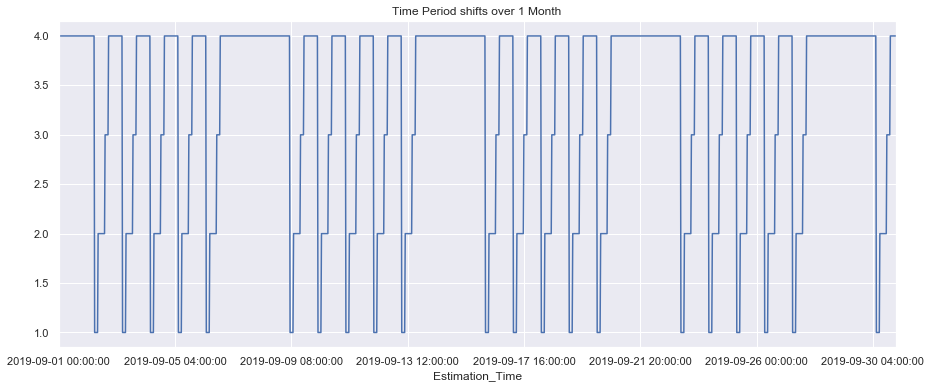

In [27]:
traffic_data['Time_Period'].plot(linewidth=1.5, title='Time Period shifts over 1 Month')
plt.show()

In [28]:
sns.set(rc={'figure.figsize':(20, 6)})

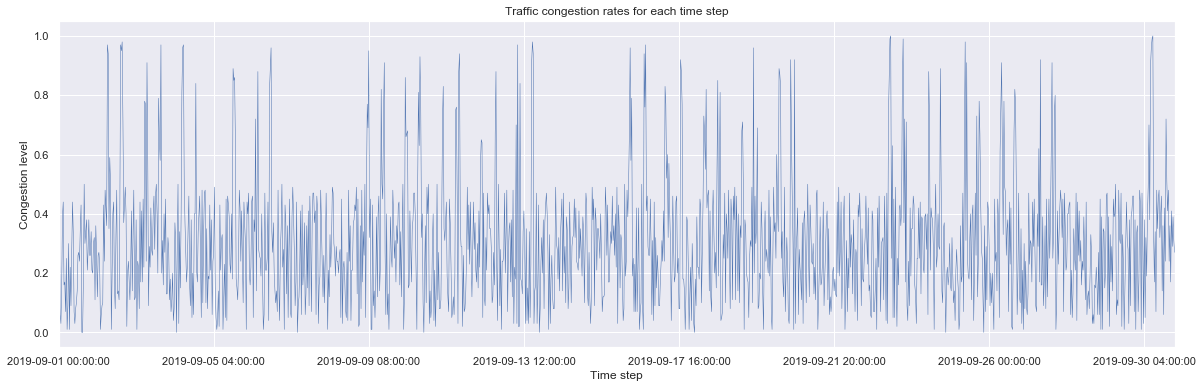

In [29]:
ax = traffic_data['Congestion_level'].plot(linewidth=0.5, title='Traffic congestion rates for each time step')
ax.set_xlabel('Time step')
ax.set_ylabel('Congestion level')
plt.show()

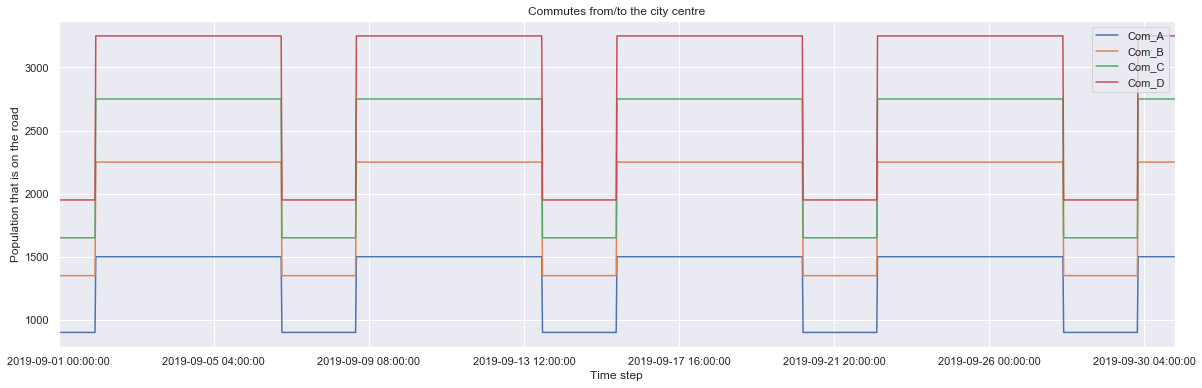

In [30]:
ax = traffic_data['Com_A'].plot(linewidth=1.5, title='Commutes from/to the city centre', label='Com_A')
ax = traffic_data['Com_B'].plot(linewidth=1.5, title='Commutes from/to the city centre', label='Com_B')
ax = traffic_data['Com_C'].plot(linewidth=1.5, title='Commutes from/to the city centre', label='Com_C')
ax = traffic_data['Com_D'].plot(linewidth=1.5, title='Commutes from/to the city centre', label='Com_D')
ax.set_xlabel('Time step')
ax.set_ylabel('Population that is on the road')
ax.legend()
plt.show()

### Export to csv file and test reading

In [31]:
traffic_data.to_csv('traffic_data.csv', sep=',', index_label='Estimation_Time')

In [32]:
traffic_data = pd.read_csv('traffic_data.csv', sep=',', index_col='Estimation_Time')

In [33]:
traffic_data.head()

,Weekday,Com_A,Com_B,Com_C,Com_D,Time_Period,Busy,Roadwork_A,Roadwork_B,Roadwork_C,Roadwork_D,Congestion_level,Sequence,Sequence_prev
Estimation_Time,,,,,,,,,,,,,,
2019-09-01 00:00:00,Sunday,900.0,1350.0,1650.0,1950.0,4,False,0,0,0,0,0.30,E,E
2019-09-01 00:30:00,Sunday,900.0,1350.0,1650.0,1950.0,4,False,0,0,1,0,0.44,BADC,E
2019-09-01 01:00:00,Sunday,900.0,1350.0,1650.0,1950.0,4,False,0,0,0,0,0.06,E,BADC
2019-09-01 01:30:00,Sunday,900.0,1350.0,1650.0,1950.0,4,False,0,0,0,1,0.03,CBAD,E
2019-09-01 02:00:00,Sunday,900.0,1350.0,1650.0,1950.0,4,False,0,0,0,0,0.15,E,CBAD
